# Bipartite Graphs

A bipartite graph is an undirected graph $G=(V,E)$
where the set of vertices $V$ has been partitioned into
two mutually disjoint sets $L,R\subset V$.

All of the edges in the graph $G$ are between the two sets $L$ and $R$.
That is, for any edge $(l,r)\in E$ the vertex $l$ is in $L$ and $r\in R$.

In [1]:
import numpy as np
import numpy.random as npr
import scipy as sp
import networkx as nx
from networkx.algorithms import bipartite, matching
from matching_functions import *

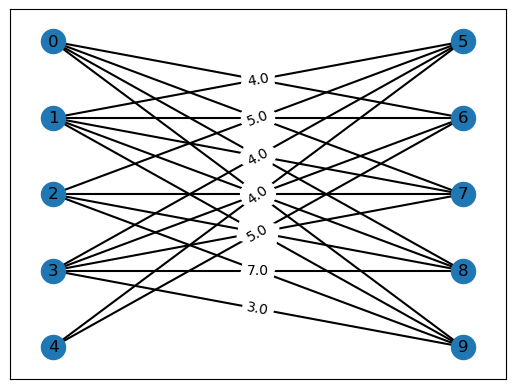

In [2]:
bmat = sp.sparse.csc_array(np.floor(np.abs(npr.normal(0,5,size=(5,5)))))
G = bipartite.from_biadjacency_matrix(bmat)
draw_bipartite(G)

In [3]:
npr.randint?

## Example bipartite graph

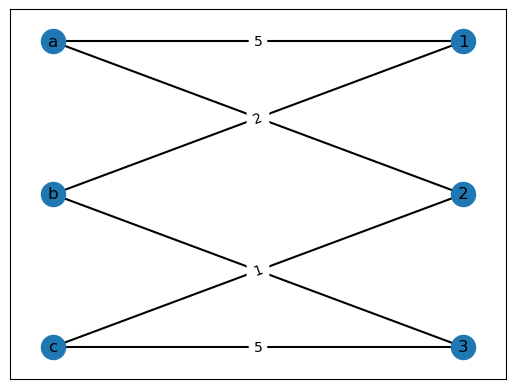

In [4]:
B = nx.Graph()

top_nodes = list("abc")
bottom_nodes = [1,2,3]
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

B.add_edge('a', 1.0, weight=5)
B.add_edge('a', 2.0, weight=2)

B.add_edge('b', 1.0, weight=2)
B.add_edge('b', 3.0, weight=1)

B.add_edge('c', 2.0, weight=1)
B.add_edge('c', 3.0, weight=5)

draw_bipartite(B)

In [ ]:
n = 5
B = nx.Graph()

top_nodes = list(range(n))
bottom_nodes = list(range(n,2*n))

B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

#sigma1 = npr.permutation(bottom_nodes)
#sigma2 = npr.permutation(bottom_nodes)

for i in range(n):
    #B.add_edge(i, sigma1[i], weight=npr.randint(10)+1)
    #B.add_edge(i, sigma2[i], weight=1)

    B.add_edge(i, n+i, weight=1)
    if i > 0:
        B.add_edge(i, n+i-1, weight=2.0)
    if i < n-1:
        B.add_edge(i, n+i+1, weight=1.0)

draw_bipartite(B, top_nodes=top_nodes, bottom_nodes=bottom_nodes)

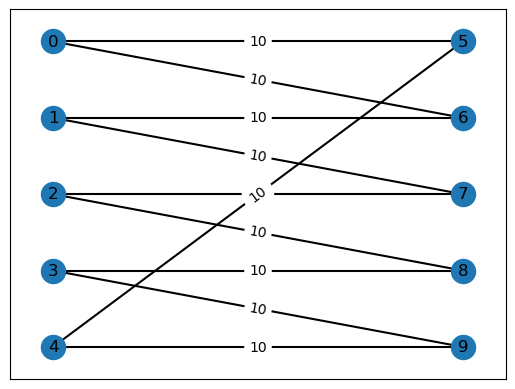

In [39]:
n = 5
B = nx.Graph()

top_nodes = list(range(n))
bottom_nodes = list(range(n,2*n))

B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

#sigma1 = npr.permutation(bottom_nodes)
#sigma2 = npr.permutation(bottom_nodes)

for i in range(n):
    #B.add_edge(i, sigma1[i], weight=npr.randint(10)+1)
    #B.add_edge(i, sigma2[i], weight=1)
  for t in range(2):
    B.add_edge(i, (i+t) % n + n, weight=10)
draw_bipartite(B, top_nodes=top_nodes, bottom_nodes=bottom_nodes)

## Matchings
A matching $M$ is a subset $M\subseteq E$ of the edges in the bipartite graph $G=(V,E)$,
where each vertex $v\in V$ has a single edge incident on it.

### Perfect matching
A perfect matching is a matching where each vertex in $L$ is matched with a vertex in $R$
and vertex in both $L$ and $R$ have a matching.

### Minimum weight matching
A minimum weight matching is a matching,
which has a less than or equal sum of edge weights when compered to any other matching.


### Minimum weight perfect matching
A minimum weight matching is a perfect matching,
if it has a less than or equal sum of edge weights when compered to any other perfect matching.

#### Example of a minimum weight perfect matching

Cost: 50


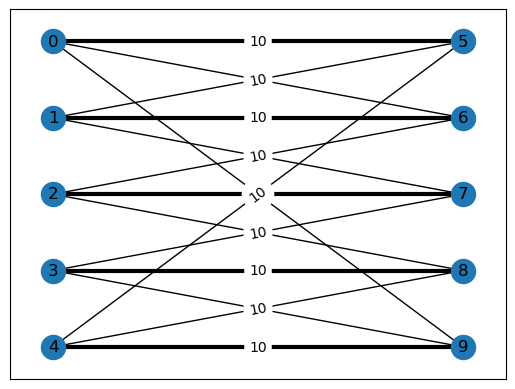

In [34]:
match = bipartite.matching.minimum_weight_full_matching(B, top_nodes=top_nodes)
match = [(v,match[v]) for v in top_nodes if v in match.keys()]
draw_bipartite(B, match=match, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
print("Cost:", total_cost(B, match))

### Maximum weight matching
Maximum weight matching is a matching which has the maximum sum of edge weights.

Note that maximum weight matching is maximal matching?
i.e. there can be added no more edges
to the matching.

#### Example
Note that this matching is not perfect, yet it has the maximum total weight.

Cost: 50


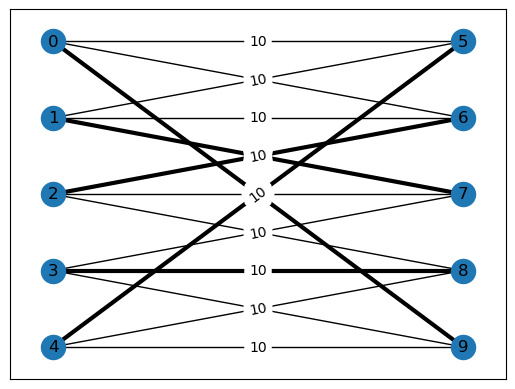

In [33]:
match = matching.max_weight_matching(B)
draw_bipartite(B, match=match, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
print("Cost:", total_cost(B, match))

In [41]:
bipartite.biadjacency_matrix(B, row_order=top_nodes).toarray()

/var/folders/_g/qyjr0wk13n9bm27s1td5tcj40000gn/T/ipykernel_76047/1595652662.py:1: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  bipartite.biadjacency_matrix(B, row_order=top_nodes).toarray()


array([[10, 10,  0,  0,  0],
       [ 0, 10, 10,  0,  0],
       [ 0,  0, 10, 10,  0],
       [ 0,  0,  0, 10, 10],
       [10,  0,  0,  0, 10]])

### Maximum Weighted Perfect Matching 
Maximum weight perfect matching is a matching,
which has a greater or equal sum of edge weights when compered to any other perfect matching.

#### Example
Note that this matching is perfect, but its total weight is less then the previous example.

This example is a maximum weight perfect matching,
since it has the maximum total weight when we compare it to any other perfect matching.

/Users/yessergire/Documents/write/tricky-code/notebooks-gumbel/matching_functions.py:53: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  biadjacency = bipartite.biadjacency_matrix(B, row_order=top_nodes)


Cost: 0


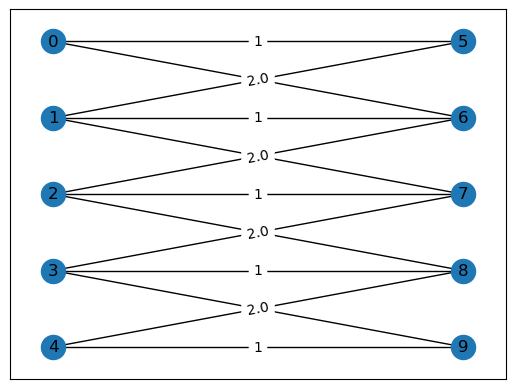

In [8]:
match = weight_full_matching(B, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
draw_bipartite(B, match=match, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
print("Cost:", total_cost(B, match))

### Random Perfect Matching

from matching_sampler import perturb_graph
G = perturb_graph(B)
match = weight_full_matching(G, top_nodes=top_nodes, bottom_nodes=bottom_nodes, maximum=True)
draw_bipartite(B, match=match, show_weights=True)
print("Cost(B):", total_cost(B, match))
print("Cost(G):", total_cost(G, match))
match

In [45]:
biadjacency = bipartite.biadjacency_matrix(B, row_order=top_nodes)
biadjacency.toarray()

/var/folders/_g/qyjr0wk13n9bm27s1td5tcj40000gn/T/ipykernel_76047/600808789.py:1: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  biadjacency = bipartite.biadjacency_matrix(B, row_order=top_nodes)


<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [11]:
from scipy.sparse.csgraph import min_weight_full_bipartite_matching
min_weight_full_bipartite_matching(biadjacency)

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4], dtype=int32))

In [12]:
biadjacency_array = biadjacency.toarray()
inf_indecies = (biadjacency_array == 0)
#biadjacency_array = biadjacency.max() - biadjacency_array
biadjacency_array[inf_indecies] = np.inf
biadjacency_array

array([[ 1.,  1., inf, inf, inf],
       [ 2.,  1.,  1., inf, inf],
       [inf,  2.,  1.,  1., inf],
       [inf, inf,  2.,  1.,  1.],
       [inf, inf, inf,  2.,  1.]])

In [13]:
from scipy.optimize import linear_sum_assignment
match = linear_sum_assignment(biadjacency_array)
match

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

In [14]:
match_t = [(top_nodes[match[0][i]], bottom_nodes[match[1][i]])  for i in range(len(match[0]))]
match_t

[(0, 5), (1, 6), (2, 7), (3, 8), (4, 9)]

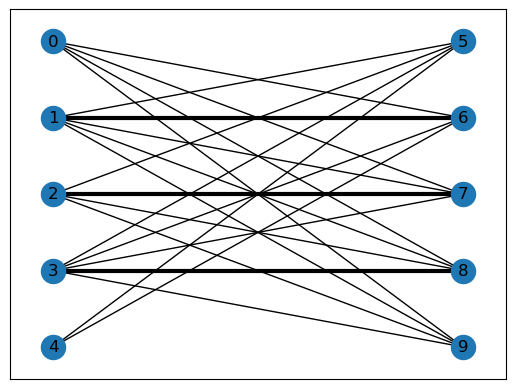

In [15]:
tmp = [(top_nodes[match[0][i]], bottom_nodes[match[1][i]])  for i in range(len(match[0]))]
draw_bipartite(G, match=match_t, show_weights=False)

array([[1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

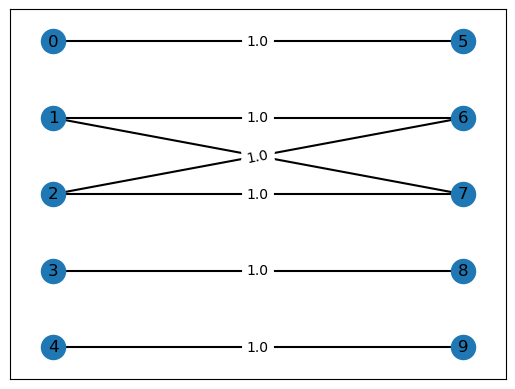

In [93]:
n = 5
biadjacency = np.zeros((n,n))
I = np.arange(n)
biadjacency[I, I] = 1

#biadjacency[1,1] = biadjacency[2,2] = 0
biadjacency[2,1] = biadjacency[1,2] = 1

g = bipartite.from_biadjacency_matrix(sp.sparse.csc_array(biadjacency))
#draw_bipartite(g)

draw_bipartite(g, top_nodes=I, bottom_nodes=I+n)
biadjacency

/var/folders/_g/qyjr0wk13n9bm27s1td5tcj40000gn/T/ipykernel_76047/2362337080.py:18: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  bipartite.biadjacency_matrix(B, row_order=top_nodes).toarray()


array([[5, 0, 0],
       [0, 1, 0],
       [0, 0, 5]])

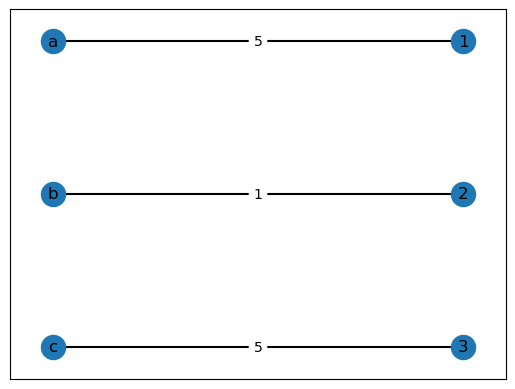

In [76]:
B = nx.Graph()

top_nodes = list("abc")
bottom_nodes = [1,2,3]
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

B.add_edge('a', 1, weight=5)
B.add_edge('b', 2, weight=1)
B.add_edge('c', 3, weight=5)

draw_bipartite(B, top_nodes, bottom_nodes)
bipartite.biadjacency_matrix(B, row_order=top_nodes).toarray()

In [ ]:
def GumbelNoise(N):
    return -np.log(-np.log(npr.uniform(size=N)))

j = 1
N = biadjacency.shape[0] # 5

noise = GumbelNoise((N-j-1,N))
perturbed_biadjacency = biadjacency.toarray()+.0
perturbed_biadjacency[j+1:] += noise
perturbed_biadjacency

In [ ]:
adj = biadjacency.toarray()+.0
adj[adj==0.0]=-np.inf
print(adj)
top, bottom = sp.optimize.linear_sum_assignment(adj, maximize=True) 

left = list(map(lambda i: top_nodes[i], top))
right = list(map(lambda i: bottom_nodes[i], bottom))
match = list(zip(left, right))
draw_bipartite(B, match=match, show_weights=False)
adj[top, bottom].sum()

In [ ]:
left, right = bipartite.sets(B)
bmatrix = bipartite.biadjacency_matrix(B, row_order=left).toarray()

In [ ]:
np.array(bmatrix, dtype=np.float64)

In [ ]:
weights = bipartite.biadjacency_matrix(G, row_order=left).toarray()
left, right = np.array(match).reshape((5,2)).T
np.exp(np.log(weights[left, right-5]).sum())